In [133]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import tensorflow

In [134]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() 
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\huyen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\huyen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\huyen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [151]:
df = pd.read_csv('mr/sst2.csv', encoding='unicode_escape', header=0)

In [152]:
df.head(5)

,sentiment,review,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,0,one long string of cliches .,NaN,NaN,NaN,NaN,NaN
1,0,if you 've ever entertained the notion of doin...,NaN,NaN,NaN,NaN,NaN
2,0,k-19 exploits our substantial collective fear ...,NaN,NaN,NaN,NaN,NaN
3,0,it 's played in the most straight-faced fashio...,NaN,NaN,NaN,NaN,NaN
4,1,"there is a fabric of complex ideas here , and ...",NaN,NaN,NaN,NaN,NaN


In [153]:
df.info() # Basic Information
print("\nShape: ",df.shape) # Shape of data
print("\nChecking for missing values")
df.isnull().sum()# Check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9613 entries, 0 to 9612
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sentiment   9613 non-null   int64 
 1   review      9613 non-null   object
 2   Unnamed: 2  333 non-null    object
 3   Unnamed: 3  137 non-null    object
 4   Unnamed: 4  37 non-null     object
 5   Unnamed: 5  5 non-null      object
 6   Unnamed: 6  2 non-null      object
dtypes: int64(1), object(6)
memory usage: 525.8+ KB

Shape:  (9613, 7)

Checking for missing values


sentiment        0
review           0
Unnamed: 2    9280
Unnamed: 3    9476
Unnamed: 4    9576
Unnamed: 5    9608
Unnamed: 6    9611
dtype: int64

In [154]:
df.head(5)

,sentiment,review,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,0,one long string of cliches .,NaN,NaN,NaN,NaN,NaN
1,0,if you 've ever entertained the notion of doin...,NaN,NaN,NaN,NaN,NaN
2,0,k-19 exploits our substantial collective fear ...,NaN,NaN,NaN,NaN,NaN
3,0,it 's played in the most straight-faced fashio...,NaN,NaN,NaN,NaN,NaN
4,1,"there is a fabric of complex ideas here , and ...",NaN,NaN,NaN,NaN,NaN


In [155]:
#Dropping unnecessary columns
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6'],axis=1,inplace=True)

In [156]:
df.to_csv('mr/sst2.csv', index=False)

In [1]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    print('GPU device not found')

Found GPU at: /device:GPU:0


In [2]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: NVIDIA GeForce GTX 1080 Ti


In [3]:
import pandas as pd

In [4]:
from numpy.random import RandomState
#%% Split whole dataset into train and valid set
df = pd.read_csv('mr/sst2.csv', encoding='unicode_escape', header=0)
rng = RandomState()

train = df.sample(frac=0.9, random_state=rng)
test = df.loc[~df.index.isin(train.index)]
train.to_csv('mr/train-sst2.csv', index=False)
test.to_csv('mr/test-sst2.csv', index=False)

In [5]:
train_df = pd.read_csv("mr/train-sst2.csv", encoding='unicode_escape', header=0)

In [6]:
train_df

,sentiment,review
0,1,the lion king was a roaring success when it wa...
1,1,"there are no special effects , and no hollywoo..."
2,1,it 's a visual delight and a decent popcorn ad...
3,0,"the film contains no good jokes , no good scen..."
4,1,"waydowntown may not be an important movie , or..."
...,...,...
8647,1,"hilarious , touching and wonderfully dyspeptic ."
8648,0,it appears to have been made by people to whom...
8649,1,preaches to two completely different choirs at...
8650,0,made me unintentionally famous -- as the queas...


In [7]:
train_df.iloc[0][1]

C:\Users\huyen\AppData\Local\Temp\ipykernel_26668\1864895821.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train_df.iloc[0][1]


'the lion king was a roaring success when it was released eight years ago , but on imax it seems better , not just bigger .'

In [8]:
test_df = pd.read_csv("mr/test-sst2.csv", encoding='unicode_escape', header=0)

In [9]:
test_df.shape

(961, 2)

In [10]:
test_df.head()

,sentiment,review
0,0,all the amped-up tony hawk-style stunts and th...
1,1,"on this tricky topic , tadpole is very much a ..."
2,0,it offers little beyond the momentary joys of ...
3,0,coughs and sputters on its own postmodern conc...
4,0,may reawaken discussion of the kennedy assassi...


In [11]:
train_df['sentiment'] = (train_df['sentiment']).astype(int)
test_df['sentiment'] = (test_df['sentiment']).astype(int)

train_df.head(30)

,sentiment,review
0,1,the lion king was a roaring success when it wa...
1,1,"there are no special effects , and no hollywoo..."
2,1,it 's a visual delight and a decent popcorn ad...
3,0,"the film contains no good jokes , no good scen..."
4,1,"waydowntown may not be an important movie , or..."
5,1,as animation increasingly emphasizes the compu...
6,1,though in some ways similar to catherine breil...
7,1,leigh 's film is full of memorable performance...
8,1,the reason this picture works better than its ...
9,1,"the art direction is often exquisite , and the..."


In [12]:
test_df.head()

,sentiment,review
0,0,all the amped-up tony hawk-style stunts and th...
1,1,"on this tricky topic , tadpole is very much a ..."
2,0,it offers little beyond the momentary joys of ...
3,0,coughs and sputters on its own postmodern conc...
4,0,may reawaken discussion of the kennedy assassi...


In [13]:
train_df_bert = pd.DataFrame({
    "id": range(len(train_df)),
    "label": train_df['sentiment'],
    "sentence": train_df['review'].replace(r'\n', ' ', regex=True)
})

train_df_bert.head()

,id,label,sentence
0,0,1,the lion king was a roaring success when it wa...
1,1,1,"there are no special effects , and no hollywoo..."
2,2,1,it 's a visual delight and a decent popcorn ad...
3,3,0,"the film contains no good jokes , no good scen..."
4,4,1,"waydowntown may not be an important movie , or..."


In [14]:
train_df_bert

,id,label,sentence
0,0,1,the lion king was a roaring success when it wa...
1,1,1,"there are no special effects , and no hollywoo..."
2,2,1,it 's a visual delight and a decent popcorn ad...
3,3,0,"the film contains no good jokes , no good scen..."
4,4,1,"waydowntown may not be an important movie , or..."
...,...,...,...
8647,8647,1,"hilarious , touching and wonderfully dyspeptic ."
8648,8648,0,it appears to have been made by people to whom...
8649,8649,1,preaches to two completely different choirs at...
8650,8650,0,made me unintentionally famous -- as the queas...


In [15]:
train_df_bert = train_df_bert.iloc[0:10000]

In [16]:
train_df_bert

,id,label,sentence
0,0,1,the lion king was a roaring success when it wa...
1,1,1,"there are no special effects , and no hollywoo..."
2,2,1,it 's a visual delight and a decent popcorn ad...
3,3,0,"the film contains no good jokes , no good scen..."
4,4,1,"waydowntown may not be an important movie , or..."
...,...,...,...
8647,8647,1,"hilarious , touching and wonderfully dyspeptic ."
8648,8648,0,it appears to have been made by people to whom...
8649,8649,1,preaches to two completely different choirs at...
8650,8650,0,made me unintentionally famous -- as the queas...


In [17]:
test_df_bert = pd.DataFrame({
    "id": range(len(test_df)),
    "label": test_df['sentiment'],
    "sentence": test_df['review'].replace(r'\n', ' ', regex=True)
})

test_df_bert.head()

,id,label,sentence
0,0,0,all the amped-up tony hawk-style stunts and th...
1,1,1,"on this tricky topic , tadpole is very much a ..."
2,2,0,it offers little beyond the momentary joys of ...
3,3,0,coughs and sputters on its own postmodern conc...
4,4,0,may reawaken discussion of the kennedy assassi...


In [18]:
test_df_bert = test_df_bert.iloc[0:3000]

In [19]:
test_df_bert

,id,label,sentence
0,0,0,all the amped-up tony hawk-style stunts and th...
1,1,1,"on this tricky topic , tadpole is very much a ..."
2,2,0,it offers little beyond the momentary joys of ...
3,3,0,coughs and sputters on its own postmodern conc...
4,4,0,may reawaken discussion of the kennedy assassi...
...,...,...,...
956,956,0,"starts off with a bang , but then fizzles like..."
957,957,1,"together , tok and o orchestrate a buoyant , d..."
958,958,0,earnest falls short of its ideal predecessor l...
959,959,0,an uneven film dealing with too many problems ...


In [20]:
# Get the lists of sentences and their labels.
train_sentences = train_df_bert.sentence.values
train_labels = train_df_bert.label.values

In [21]:
# Get the lists of sentences and their labels.
test_sentences = test_df_bert.sentence.values
test_labels = test_df_bert.label.values

In [22]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [23]:
# Print the original sentence.
print(' Original: ', train_sentences[1])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(train_sentences[1]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(train_sentences[1])))

 Original:  there are no special effects , and no hollywood endings .
Tokenized:  ['there', 'are', 'no', 'special', 'effects', ',', 'and', 'no', 'hollywood', 'endings', '.']
Token IDs:  [2045, 2024, 2053, 2569, 3896, 1010, 1998, 2053, 5365, 21306, 1012]


In [24]:
import warnings
warnings.filterwarnings('ignore')

max_len_train = 0

# For every sentence...
for sent in train_sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent[:512], add_special_tokens=True)

    # Update the maximum sentence length.
    max_len_train = max(max_len_train, len(input_ids))

print('Max sentence length: ', max_len_train)

Max sentence length:  78


In [25]:
max_len_test = 0

# For every sentence...
for sent in test_sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent[:512], add_special_tokens=True)

    # Update the maximum sentence length.
    max_len_test = max(max_len_test, len(input_ids))

print('Max sentence length: ', max_len_test)

Max sentence length:  61


In [26]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in train_sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 60,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                        truncation=True
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(train_labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', train_sentences[0])
print('Token IDs:', input_ids[0])

Original:  the lion king was a roaring success when it was released eight years ago , but on imax it seems better , not just bigger .
Token IDs: tensor([  101,  1996,  7006,  2332,  2001,  1037, 17197,  3112,  2043,  2009,
         2001,  2207,  2809,  2086,  3283,  1010,  2021,  2006, 10047,  8528,
         2009,  3849,  2488,  1010,  2025,  2074,  7046,  1012,   102,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])


In [27]:

train_df_bert.head()

,id,label,sentence
0,0,1,the lion king was a roaring success when it wa...
1,1,1,"there are no special effects , and no hollywoo..."
2,2,1,it 's a visual delight and a decent popcorn ad...
3,3,0,"the film contains no good jokes , no good scen..."
4,4,1,"waydowntown may not be an important movie , or..."


In [28]:
(x_train, y_train), (x_test, y_test) = (train_df_bert.sentence,train_df_bert.label),(test_df_bert.sentence,test_df_bert.label)

In [29]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [30]:
from keras_preprocessing.sequence import pad_sequences
# 2 - Define the number of words to be used from a review (truncate and pad input sequences)
print('Pad sequences (samples x time)')

max_review_length = 60

x_train = pad_sequences(x_train, maxlen=max_review_length)
print('X_train shape:',x_train.shape)
x_test = pad_sequences(x_test, maxlen=max_review_length)
print('X_test shape:',x_test.shape)

Pad sequences (samples x time)
X_train shape: (8652, 60)
X_test shape: (961, 60)


In [31]:
from keras import backend as K
from tensorflow import keras
import tensorflow as tf

class FuzzyLayer(keras.layers.Layer):

    def __init__(self, 
                 output_dim, 
                 initial_centers=None,
                 initial_sigmas=None, 
                 **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        self.output_dim = output_dim
        self.initial_centers = initial_centers
        self.initial_sigmas = initial_sigmas
        super(FuzzyLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.input_dimensions = list(input_shape)[:-1:-1]

        c_init_values =[]
        
        if self.initial_centers is None:
            c_init_values= tf.random_uniform_initializer(-1, 1)(shape=(input_shape[-1], self.output_dim), dtype="float32")    
        else:
            c_init_values =tf.convert_to_tensor(self.initial_centers, dtype="float32")
        self.c = tf.Variable(initial_value= c_init_values, trainable=True)

        a_init_values = []
        if self.initial_sigmas is None:
            a_init_values = tf.ones_initializer()(shape=(input_shape[-1], self.output_dim), dtype="float32")    
        else:
            a_init_values = tf.convert_to_tensor(self.initial_sigmas, dtype="float32")
        self.a = tf.Variable(initial_value= a_init_values, trainable=True)
        super(FuzzyLayer, self).build(input_shape)  

    def call(self, x):
        
        aligned_x = K.repeat_elements(K.expand_dims(x, axis = -1), self.output_dim, -1)
        aligned_c = self.c
        aligned_a = self.a
        for dim in self.input_dimensions:
            aligned_c = K.repeat_elements(K.expand_dims(aligned_c, 0), dim, 0)
            aligned_a = K.repeat_elements(K.expand_dims(aligned_a, 0), dim, 0)

        xc = K.exp(-K.sum(K.square((aligned_x - aligned_c) / (2 * aligned_a)), axis=-2, keepdims=False))
        
        return xc
        
    def compute_output_shape(self, input_shape):
        return tuple(input_shape[:-1]) + (self.output_dim,)


In [32]:
import tensorflow as tf
from tensorflow import keras
from keras import backend as K

class DefuzzyLayer(keras.layers.Layer):

    def __init__(self, 
                 output_dim, 
                 initial_rules_outcomes=None,
                 **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        self.output_dim = output_dim
        self.initial_rules_outcomes = initial_rules_outcomes
        super(DefuzzyLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.input_dimensions = list(input_shape)[:-1:-1]

        outcomes_init_values = []
        if self.initial_rules_outcomes is None:
            outcomes_init_values = tf.random_uniform_initializer()(shape=(input_shape[-1], self.output_dim), dtype="float32")    
        else:
            outcomes_init_values = tf.convert_to_tensor(self.initial_rules_outcomes, dtype="float32")
        
        self.rules_outcome = tf.Variable(initial_value = outcomes_init_values, trainable=True)
        
        super(DefuzzyLayer, self).build(input_shape)  

    def call(self, x):
        aligned_x = K.repeat_elements(K.expand_dims(x, axis = -1), self.output_dim, -1)
        aligned_rules_outcome = self.rules_outcome
        for dim in self.input_dimensions:
            aligned_rules_outcome = K.repeat_elements(K.expand_dims(aligned_rules_outcome, 0), dim, 0)
        
        xc = K.sum((aligned_x * aligned_rules_outcome), axis=-2, keepdims=False)
        return xc
        
    def compute_output_shape(self, input_shape):
        return tuple(input_shape[:-1]) + (self.output_dim,)
    
    def get_config(self):
        return {"rules_outcome": self.rules_outcome.numpy()}


In [35]:

import tensorflow
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation, Flatten
from keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from keras.layers import Conv1D
from keras.layers import GlobalMaxPooling1D,MaxPooling1D
from keras.layers import Embedding
import matplotlib.pyplot as plt
import torch.optim as optim
#from FuzzyLayer import FuzzyLayer
#from DefuzzyLayer import DefuzzyLayer

# 3 - Neural network model design
print('Building model')
max_features = 2000
embedding_vector_length = 32
hidden_dims = 40

model = Sequential()
model.add(Embedding(max_features, embedding_vector_length, input_length=max_review_length))

model.add(Conv1D(filters=32, kernel_size=5, padding='same', activation='relu',))
model.add(Dropout(0.1))
model.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(30,activation='tanh',
                             recurrent_activation='sigmoid',
                             return_state=False,
                             return_sequences=False)))
model.add(Dropout(0.1))
model.add(FuzzyLayer(20, input_dim=2))
model.add(Dropout(0.1))
model.add(DefuzzyLayer(10))
model.add(Dropout(0.1))
#model.add(Dense(2, activation='softmax'))
model.add(Dense(1, activation='sigmoid'))
#model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

model.summary()


Building model
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 60, 32)            64000     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 60, 32)            5152      
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 32)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 60, 32)            4128      
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 32)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 60, 32)            3104      
_________________________________________________________________
dropout_3 (Dropout)          (None, 60,

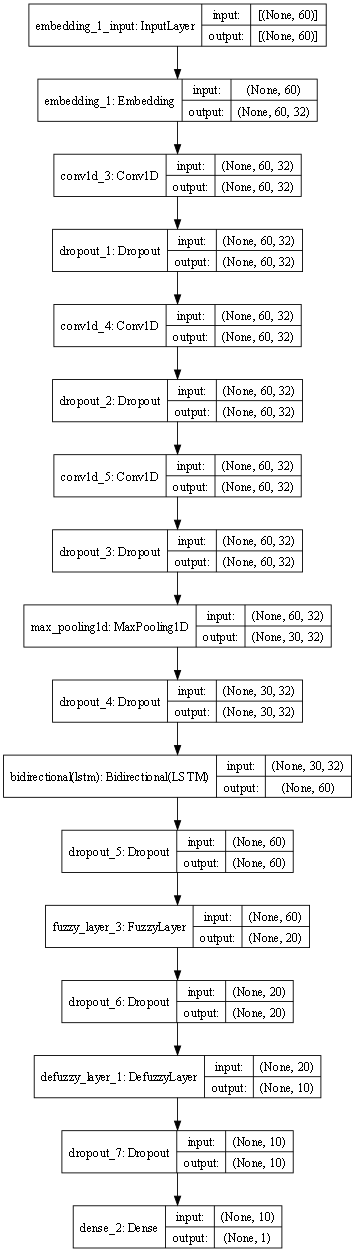

In [36]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'
tf.keras.utils.plot_model(model, show_shapes=True, dpi=64)

In [37]:
import numpy
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# 4 - Train the neural network model
history = model.fit(x_train, y_train,
                    epochs=20,
                    verbose=True,
                    callbacks=[es_callback],
                    #validation_data=(x_test, y_test),
                    validation_split=0.1,
                    batch_size=10)

loss, accuracy = model.evaluate(x_train, y_train, verbose=True)
print("Training Accuracy: {:.6f}".format(accuracy))
print("Training Loss: {:.6f}".format(loss))
loss, accuracy = model.evaluate(x_test, y_test, verbose=True)
print("Testing Accuracy:  {:.6f}".format(accuracy))
print("Testing Loss:  {:.6f}".format(loss))


Epoch 1/20
779/779 [==============================] - 16s 15ms/step - loss: 0.6839 - accuracy: 0.5343 - val_loss: 0.6328 - val_accuracy: 0.6778
Epoch 2/20
779/779 [==============================] - 11s 14ms/step - loss: 0.5554 - accuracy: 0.7377 - val_loss: 0.5151 - val_accuracy: 0.7564
Epoch 3/20
779/779 [==============================] - 11s 14ms/step - loss: 0.4084 - accuracy: 0.8284 - val_loss: 0.5072 - val_accuracy: 0.7656
Epoch 4/20
779/779 [==============================] - 11s 14ms/step - loss: 0.3332 - accuracy: 0.8694 - val_loss: 0.4795 - val_accuracy: 0.7898
Epoch 5/20
779/779 [==============================] - 11s 14ms/step - loss: 0.2729 - accuracy: 0.8947 - val_loss: 0.5550 - val_accuracy: 0.7679
Epoch 6/20
779/779 [==============================] - 11s 14ms/step - loss: 0.2276 - accuracy: 0.9147 - val_loss: 0.6085 - val_accuracy: 0.7633
Epoch 7/20
271/271 [==============================] - 2s 6ms/step - loss: 0.1806 - accuracy: 0.9394
Training Accuracy: 0.939436
Training

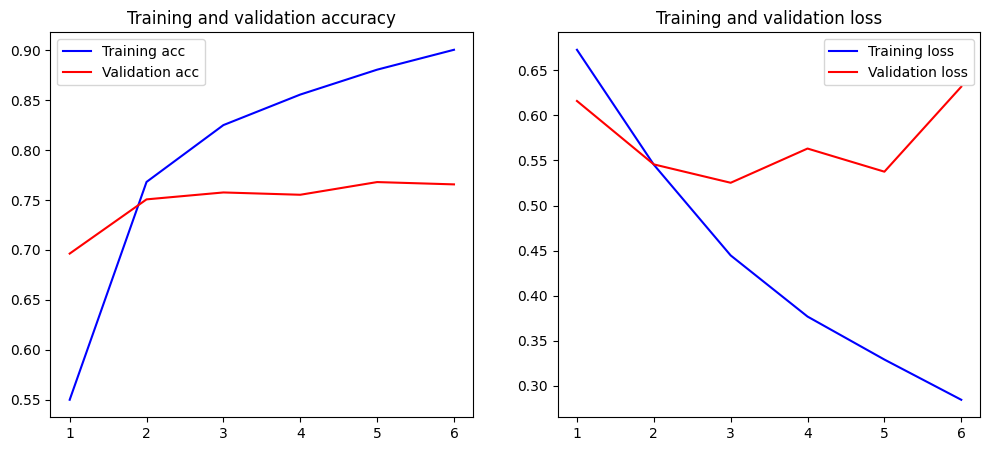

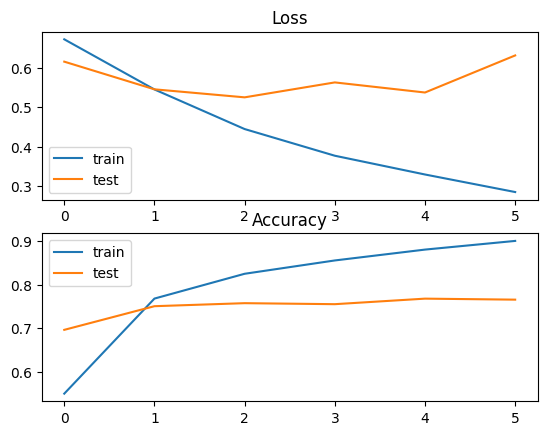

In [42]:
import matplotlib.pyplot as plt
#% matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# Vẽ đồ thị hàm loss
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# Vẽ đồ thị độ chính xác
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()